In [2]:
import numpy as np

In [1]:
from scipy.stats import uniform, norm, binom

In [5]:
import matplotlib.pyplot as plt

Using scipy.stats to explore probability distributions!

a few different functions to know

pmf - probability mass function

pdf -  probability density function

cdf - cumulative distribution function

ppf - percent point function

rvs - random variates, random variable sample? Something like that

mean, var, skew, kurt = distribution.stats(moments= 'mvsk')      

pmf - probability mass function

For discrete distributions, tells you how likely a certain result is.

Flip 10 fair coins, how likely is getting 4 heads?

In [4]:
ten_fair_coins = binom(10, .5)

In [5]:
ten_fair_coins.stats(moments='mvsk')

(array(5.), array(2.5), array(0.), array(-0.2))

In [6]:
ten_fair_coins.pmf(4)

0.20507812500000022

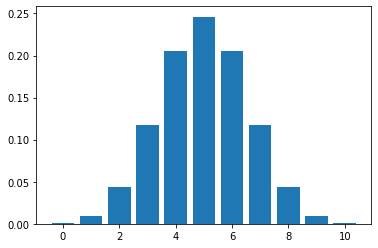

In [9]:
plt.bar(range(11), ten_fair_coins.pmf(range(11)));

Now what do we use if I want to know how likely it is to get 4 heads or less? <br>

In [10]:
ten_fair_coins.pmf(4) + ten_fair_coins.pmf(3) + ten_fair_coins.pmf(2) + ten_fair_coins.pmf(1) + ten_fair_coins.pmf(0)

0.37695312500000033

Is there an easier way to do this? <br>
Yes, yes there is... <br>

The Cumulative Distribution Function!!

Can be used with discrete and continous distributions.

In [11]:
ten_fair_coins.cdf(4)

0.3769531250000001

How could I find how likely it would be to get between 3 and 6 heads inclusive?

In [12]:
ten_fair_coins.pmf([3, 4, 5, 6])

array([0.1171875 , 0.20507813, 0.24609375, 0.20507813])

In [13]:
ten_fair_coins.pmf([3, 4, 5, 6]).sum()

0.7734375000000008

In [14]:
ten_fair_coins.cdf(6) - ten_fair_coins.cdf(2)

0.7734375

How likely is it to get an odd number of heads?

In [16]:
[i for i in range(1, 11, 2)]

[1, 3, 5, 7, 9]

In [17]:
ten_fair_coins.pmf([i for i in range(1, 11, 2)]).sum()

0.5000000000000006

So that's the pmf and cdf for a discrete distribution. Remember there is no pdf for a discrete distribution!

In [18]:
ten_fair_coins.pdf(3)

AttributeError: 'binom_gen' object has no attribute 'pdf'

How about a ppf?

In [20]:
ten_fair_coins.ppf(.5)

5.0

So what does the ppf do?

The ppf is the inverse cdf.

So what does the cdf do?
It takes a value and tells you how likely it is that the distribution produces a value equal to or less than that value.

So if the ppf is the inverse, it takes a likelihood or percentile, and returns the value at that likelihood/percentile.

So let's say a thousand people flip a fair coin ten times and record their results. How many heads would I have to get to be in the 90th percentile?

In [21]:
ten_fair_coins.ppf(.9)

7.0

Is it true? Let's test it!

In [24]:
experiment = ten_fair_coins.rvs(1000)

In [25]:
len(experiment[experiment <= 7])/1000

0.948

For discrete distributions the percentiles are ranges, because you can't have 7.5 flips or whatnot as a result, makes the ppf perhaps a little more intuitive with a continuous distribution

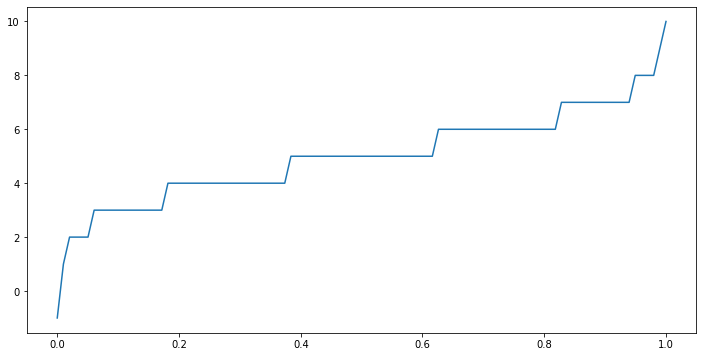

In [26]:
x = np.linspace(0, 1, 100)
plt.figure(figsize = (12, 6))
plt.plot(x, ten_fair_coins.ppf(x))

In [27]:
ten_fair_coins.ppf(.85)

7.0

In [28]:
ten_fair_coins.ppf(.83)

7.0

Okay let's look at a continuous distribution!

What's an example of a continuous distribution?

Let's take a look at a continuous normal distribution! How about a class's grades.

Let's say their average is an 88, and the standard deviation is 5 grade points

In [29]:
class_grades = norm(88, 5)

If we checked a random student's grade, how likely would it be for them to have an 84?

In [30]:
class_grades.pmf(84)

AttributeError: 'norm_gen' object has no attribute 'pmf'

Uh oh! Continuous distributions don't have a probability mass function! Bummer!

In fact, with a continuous distributions the probability that their grade is exactly an 84 is basically 0, hence why the pmf is not useful.

So now let's see what we get from the pdf?

In [31]:
class_grades.pdf(84)

0.05793831055229655

Hm, is this saying that the probability of an 84 is .05793? No, the values you get back from the pdf aren't all that useful or interpretable by themselves. Let's try graphing it over our distribution.

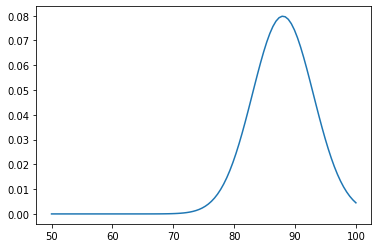

In [32]:
x = np.linspace(50,100, 100)
plt.plot(x, class_grades.pdf(x))

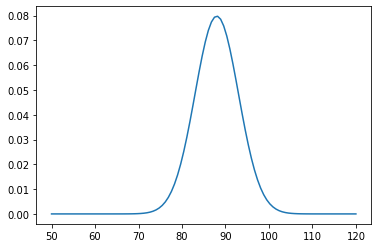

In [44]:
x = np.linspace(50,120, 100)
plt.plot(x, class_grades.pdf(x))

So that's fairly useful! But how do we find out how likely it is for the student's grade to be between 82 and 86 (inclusive)?

Just like we did with a discrete distribution:

In [33]:
class_grades.cdf(86) - class_grades.cdf(82)

0.2295085881679676

So for those of you familiar with integrals, the cdf is basically performing the integral over whatever range you're looking at.

So we just performed the integral of the pdf over the range of 82 to 86

How could we find how likely it would be to land outside of the A range (below 90)?

In [34]:
class_grades.cdf(90)

0.6554217416103242

How about how likely it is they're passing (assuming a C and up is passing)?

In [35]:
1 - class_grades.cdf(70)

0.9998408914098424

Now let's say we want to grade on a curve! Who would be in the A range for this curve(90th percentile)

In [40]:
class_grades.ppf(.9)

94.407757827723

Smart class! You'd have to get above a 94.4 to get an A in that class graded on a curve!

Another basic distribution is the uniform distribution:

In [47]:
uni = uniform(0, 10)

In [48]:
uni.pdf(1)

0.1

In [49]:
uni.pdf(4)

0.1

In [50]:
uni.pdf(12)

0.0

Lets' graph the pdf from -5 to 15

In [51]:
x = np.linspace(-5, 15, 100)

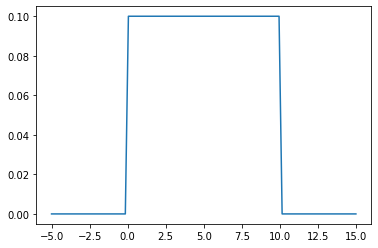

In [53]:
plt.plot(x, uni.pdf(x))

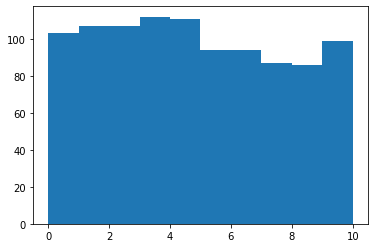

In [54]:
plt.hist(uni.rvs(1000));

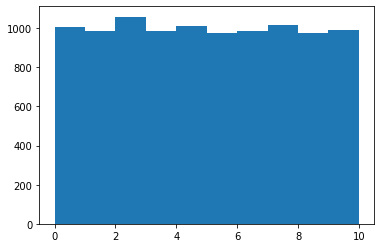

In [55]:
plt.hist(uni.rvs(10000));

One weird thing about the uniform distribution (or at least the scipy implementation), it perhaps doesn't work like you think it might:

In [3]:
uni2 = uniform(5, 10)

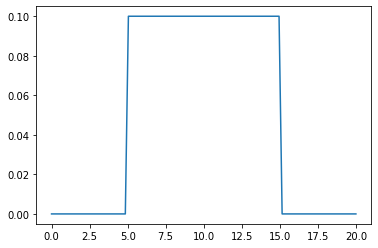

In [6]:
x = np.linspace(0, 20, 100)
plt.plot(x, uni2.pdf(x))

the distribution goes from the first number, to the first number + the second number.
so from 5 to 5 + 10 in this case.

Afternoon Exercise:



1) Which distributions best fit these scenarios
    A) Roll a six sided die.
    B) Roll six dice, how many 4's come up?
    C) Flip a fair coin 10 times, sum the number of heads.
    D) Height of Galvanize employees

2) Figure out your expected values, or means for these distributions.
    For D) we will assume we have sampled 10 heights in inches as such: [72, 63, 66, 75, 67, 61, 73, 71, 68, 62]

3) Create distributions in python to approximate these scenarios, randomly sample from your distributions 
    100 times, 1000 times, and 10000 times and check the mean of those samples
    do they agree with your expected values?

4) Calculate these probabilities for each distribution
    A) probability of an odd number
    B) probability of six 4's, probability of no 4's
    C) probability of 1 to 5 heads
    D) probability of employee being between 5'8" and 5'11", probability of employee being above 6', 
    probability of employee being 5'0" to 5'4"